# Implementing the Hybrid Naive Bayes Classifier

# <span style="color: #0099cc;"> Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 

In [2]:
# !pip install --upgrade altair
# !pip install vega vega_datasets

# <span style="color: #0099cc;">  Reading the Data</span>

* The data is read using <code>read_csv()</code> function.
* The five five rows of the dataframe is displayed below using <code>head()</code> function.

In [3]:
df_data = pd.read_csv('A3_Q1_train.csv')
df_data.head()

,row_id,age,education_years,workclass,marital_status,occupation,annual_income
0,1,48,14,Local-gov,Divorced,Prof-specialty,high_income
1,2,23,13,Local-gov,Never-married,Prof-specialty,low_income
2,3,45,13,Local-gov,Never-married,Prof-specialty,low_income
3,4,51,13,Federal-gov,Married-civ-spouse,Exec-managerial,low_income
4,5,51,14,Local-gov,Married-civ-spouse,Prof-specialty,high_income


* The number of rows and columns for the data read are displayed below using <code>shape</code> function

In [4]:
df_data.shape

(500, 7)

* The <code>dtypes</code> function is used to get the data types of every column present in the dataframe.

In [5]:
df_data.dtypes

row_id              int64
age                 int64
education_years     int64
workclass          object
marital_status     object
occupation         object
annual_income      object
dtype: object

#  <span style="color: #0099cc;"> Part A : Data Preparation</span>

* Dropping the column <code>row_id</code> as it is not irrelevant in the predictive modelling.

In [6]:
df = df_data.drop(columns=['row_id'])

In [7]:
df.shape

(500, 6)

### <span style="color: #0099cc;"> Checking for unusual values in the numerical columns</span>

In [8]:
np.unique(df['age'])

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [9]:
np.unique(df['education_years'])

array([ 1,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

When checked for unique values present in the numerical columns using `np.unique` function, there are no unsual values present.

##  <span style="color: #0099cc;"> TASK 1</span>


* The <code>cut</code> function is used to convert the <code>age</code> and <code>education_years</code> columns into 3 bins of equal width: *<code>'low','mid', and 'high'</code>*

In [10]:
df['age'] = pd.cut(df['age'],bins = 3, labels=["low", "mid", "high"])
df['education_years'] = pd.cut(df['education_years'] , bins = 3,labels=['low','mid' , 'high'])

In [11]:
df.head()

,age,education_years,workclass,marital_status,occupation,annual_income
0,high,high,Local-gov,Divorced,Prof-specialty,high_income
1,low,high,Local-gov,Never-married,Prof-specialty,low_income
2,mid,high,Local-gov,Never-married,Prof-specialty,low_income
3,high,high,Federal-gov,Married-civ-spouse,Exec-managerial,low_income
4,high,high,Local-gov,Married-civ-spouse,Prof-specialty,high_income


In [12]:
df_all_cat = df.copy()

In [13]:
# so that we can see all the columns
pd.set_option('display.max_columns', None) 
print(df_all_cat.shape)
df_all_cat.head()
###
# please run below in a separate cell!!!
for col in df_all_cat.columns.tolist():  
    print(col + ':')
    print(df_all_cat[col].value_counts())
    print('********')

(500, 6)
age:
mid     230
low     140
high    130
Name: age, dtype: int64
********
education_years:
high    304
mid     193
low       3
Name: education_years, dtype: int64
********
workclass:
Local-gov      225
State-gov      148
Federal-gov    127
Name: workclass, dtype: int64
********
marital_status:
Married-civ-spouse    230
Never-married         155
Divorced              115
Name: marital_status, dtype: int64
********
occupation:
Prof-specialty     224
Adm-clerical       159
Exec-managerial    117
Name: occupation, dtype: int64
********
annual_income:
low_income     320
high_income    180
Name: annual_income, dtype: int64
********


##  <span style="color: #0099cc;"> Task 2</span>

##  <span style="color: #0099cc;"> Encoding The Target Feature</span>

* Before performing one hot encoding of the descriptive features, it is required to remove the target which is <code>annual_income</code>

In [14]:
target = df['annual_income']
df_all_cat = df.drop(columns=['annual_income'])

* The target values are <code>'high_income'</code> and <code>'low_income'</code> and hence these should be encoded.

In [15]:
np.unique(target , return_counts=True)

(array(['high_income', 'low_income'], dtype=object), array([180, 320]))

* As <code>'high_income'</code> is positive class for this problem, encoding the <code>'high_income'</code> as 1 and <code>'low_income'</code> as 0. 

In [16]:
target_encoded = np.where(target=='high_income', 1, 0)

In [17]:
np.unique(target_encoded , return_counts=True)

(array([0, 1]), array([320, 180]))

##  <span style="color: #0099cc;"> One hot Encoding the categorical descriptive Features</span>

The <code>get_dummies()</code> method is used to do one-hot-encoding for all features that are not numeric

In [18]:
#Getting the list of categorical columns
categorical_cols = df_all_cat.columns[df_all_cat.dtypes == np.object].tolist()

# For categorical descriptive feature which has only 2 levels, only one binary variable is created
for col in categorical_cols:
    n = len(df_all_cat[col].unique())
    if n==2:
        df_all_cat[col] = pd.get_dummies(df_all_cat[col] , drop_first=True)

# The other categorical features with levels greater than 2 , 
#regular one-hot-encoding is performed using pd.get_dummies() in automatic mode  
df_all_cat = pd.get_dummies(df_all_cat)

In [19]:
df_all_cat.head()

,age_low,age_mid,age_high,education_years_low,education_years_mid,education_years_high,workclass_Federal-gov,workclass_Local-gov,workclass_State-gov,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Prof-specialty
0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1


In [20]:
data = df_all_cat.values

In [21]:
df_all_cat_ohe = df_all_cat.copy()

In [22]:
print(df_all_cat_ohe.shape)
df_all_cat_ohe.head()

(500, 15)


,age_low,age_mid,age_high,education_years_low,education_years_mid,education_years_high,workclass_Federal-gov,workclass_Local-gov,workclass_State-gov,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Prof-specialty
0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1


#  <span style="color: #0099cc;"> Part B : Using the Default Bernoulli NB</span>

* Bernoulli Naive Bayes with default parameters **(alpha=1.0)** is fit on the train data.
* The accuracy is computed on the train data.

In [23]:
from sklearn.naive_bayes import BernoulliNB
clf_NB = BernoulliNB()
clf_NB.fit(data,target_encoded)
bnb_accuracy = clf_NB.score(data,target_encoded)
bnb_accuracy

0.83

The accuracy score obtained when Bernoulli Naive Bayes with default parameters used is **0.83**

#  <span style="color: #0099cc;"> Part C :Using the default Gaussian NB</span>

* Gaussian Naive Bayes with default parameters **(var_smoothing=1e-09)** is fit on the train data.
* The accuracy is computed on the train data.

In [24]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
clf_GNB.fit(data , target_encoded)
gnb_accuracy = clf_GNB.score(data,target_encoded)
gnb_accuracy

0.728

The accuracy score obtained when Gaussian Naive Bayes with default parameters used is **0.728**

#  <span style="color: #0099cc;"> Part D : Tuning Models</span>

# <span style="color: #0099cc;">Hyperparameter Tuning <a class="anchor"></a></span>

## <span style="color: #0099cc;"> Model 1: Bernoulli NB</span> 

#### Fine-tuning the alpha parameter

* The Bernoulli Naive Bayes model is fit and it's iterated over the following Bernoulli Naive Bayes hyperparameter: 
    * **Additive smoothing parameter (Alpha)** - <code>0,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,7,9,10,30,50,100,150,200</code>
* Here higher values of Alpha are used in order to squeeze out a bit of performance for the Bernoulli Naive Bayes.

In [25]:
alphas  = [0,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,7,9,10,30,50,100,150,200]
bnb_accuracy_list = []
for a in alphas:
    clf_BNB_tuned = BernoulliNB(alpha=a)
    clf_BNB_tuned.fit(data,target_encoded)
    bnb_tuned_accuracy = clf_BNB_tuned.score(data,target_encoded)
    bnb_accuracy_list.append(bnb_tuned_accuracy)
bnb_tuned_df = pd.DataFrame({'Alpha' : alphas , 'Accuracy' : bnb_accuracy_list})
bnb_tuned_df.head(10)

,Alpha,Accuracy
0,0.0,0.83
1,0.1,0.83
2,0.2,0.83
3,0.3,0.83
4,0.4,0.83
5,0.5,0.83
6,1.0,0.83
7,2.0,0.83
8,3.0,0.83
9,4.0,0.83


In [26]:
best_bnb_default_accuracy = bnb_tuned_df.iloc[bnb_tuned_df['Accuracy'].idxmax()][1]

In [27]:
print("Best score for is" ,best_bnb_default_accuracy , "and optimal alpha parameter value is",
bnb_tuned_df.iloc[bnb_tuned_df['Accuracy'].idxmax()][0] )

Best score for is 0.838 and optimal alpha parameter value is 150.0


* We can infer that the tuned Bernoulli NB model has a <b>accuracy</b> score of 0.838.This accuracy score is obtained with 15 features and <code>optimal alpha value</code> = 150.0.
* With the higher alpha value it is seen that there is an improvement in the performance of Bernoulli NB when checked on the train data.

**Visualizing the results of the Bernoulli NB Model**

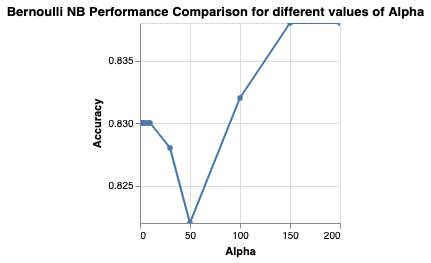

In [28]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(bnb_tuned_df,title='Bernoulli NB Performance Comparison for different values of Alpha').mark_line(point=True).encode(
    alt.X('Alpha', title='Alpha'),
    alt.Y('Accuracy', title='Accuracy', scale=alt.Scale(zero=False))).interactive()

## <span style="color: #0099cc;"> Model 2: Gaussian NB </span> 

#### Fine-tuning the var_smoothing parameter

* The Gaussian Naive Bayes model is fit and it's iterated over the following Gaussian Naive Bayes hyperparameter: 
    * **Var smoothing** - From <code>10</code> to <code>10<sup>−10</sup></code> with `100` different values.

In [29]:
smoothings  = np.logspace(1,-10, num=100)
gnb_accuracy_list = []
for smooth in smoothings:
    clf_gnb_tuned = GaussianNB(var_smoothing=smooth)
    clf_gnb_tuned.fit(data,target_encoded)
    gnb_tuned_accuracy = clf_gnb_tuned.score(data,target_encoded)
    gnb_accuracy_list.append(gnb_tuned_accuracy)
gnb_tuned_df = pd.DataFrame({'Var_Smoothing' : smoothings , 'Accuracy' : gnb_accuracy_list})
gnb_tuned_df.head(10).round(3)

,Var_Smoothing,Accuracy
0,10.000,0.640
1,7.743,0.710
2,5.995,0.798
3,4.642,0.828
4,3.594,0.844
5,2.783,0.830
6,2.154,0.830
7,1.668,0.830
8,1.292,0.830
9,1.000,0.832


In [30]:
best_gnb_default_accuracy = gnb_tuned_df.iloc[gnb_tuned_df['Accuracy'].idxmax()][1]

In [31]:
print("Best score is" , best_gnb_default_accuracy , "and optimal Var.Smoothing parameter value is",
gnb_tuned_df.iloc[gnb_tuned_df['Accuracy'].idxmax()][0].round(5) )

Best score is 0.844 and optimal Var.Smoothing parameter value is 3.59381


* We can infer that the optimal tuned Gaussian NB model has a <b>accuracy</b> score of 0.844.This accuracy score is obtained with 15 features and optimal Var. Smoothing = 3.59381.

**Visualizing the results of the grid search for Gaussian NB Model**

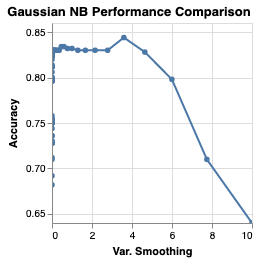

In [32]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(gnb_tuned_df,title='Gaussian NB Performance Comparison').mark_line(point=True).encode(
    alt.X('Var_Smoothing', title='Var. Smoothing'),
    alt.Y('Accuracy', title='Accuracy', scale=alt.Scale(zero=False))).interactive()

#  <span style="color: #0099cc;"> Part E : Hybrid NB</span>
* Combining Gaussian NB and Bernoulli NB

* From the original data dropping the <code>row_id</code> and <code>annual_income</code> columns.

In [33]:
hybrid_df = df_data.drop(columns=['row_id','annual_income'])
hybrid_df.head()

,age,education_years,workclass,marital_status,occupation
0,48,14,Local-gov,Divorced,Prof-specialty
1,23,13,Local-gov,Never-married,Prof-specialty
2,45,13,Local-gov,Never-married,Prof-specialty
3,51,13,Federal-gov,Married-civ-spouse,Exec-managerial
4,51,14,Local-gov,Married-civ-spouse,Prof-specialty


### Step 1: Fitting a Gaussian NB model on the continuous part of the data 

Subsetting the dataframe for only numerical columns

In [34]:
guasi_df = hybrid_df[['age' ,'education_years']]
guasi_df.head()

,age,education_years
0,48,14
1,23,13
2,45,13
3,51,13
4,51,14


In [35]:
guasi_df.shape

(500, 2)

As Gaussian NB requires each descriptive feature to follow a Gaussian distribution, power transformation is performed on the data

In [36]:
from sklearn.preprocessing import PowerTransformer
gausi_transformed = PowerTransformer().fit_transform(guasi_df)

* The transformed numerical data is fitted on Gaussian Naive Bayes with default parameters **(var_smoothing=1e-09)**

In [37]:
clf_GNB = GaussianNB()
clf_GNB.fit(gausi_transformed , target_encoded)

GaussianNB(priors=None, var_smoothing=1e-09)

### Step 2: Probabilities for the target from the continuous part of the data

The probabilities for the target is obtained from the function <code>predict_proba</code>

In [38]:
gnb_probas = clf_GNB.predict_proba(gausi_transformed)
gnb_probas[:10].round(3)

array([[0.28 , 0.72 ],
       [0.941, 0.059],
       [0.419, 0.581],
       [0.365, 0.635],
       [0.264, 0.736],
       [0.993, 0.007],
       [0.228, 0.772],
       [0.805, 0.195],
       [0.367, 0.633],
       [0.891, 0.109]])

### Step 3:  Fitting a Bernoulli NB  model on categorical descriptive features of the data 

Subsetting the dataframe for only categorical descriptive columns

In [39]:
bern_df = hybrid_df[['workclass','marital_status','occupation']]
bern_df.head()

,workclass,marital_status,occupation
0,Local-gov,Divorced,Prof-specialty
1,Local-gov,Never-married,Prof-specialty
2,Local-gov,Never-married,Prof-specialty
3,Federal-gov,Married-civ-spouse,Exec-managerial
4,Local-gov,Married-civ-spouse,Prof-specialty


In [40]:
bern_df.shape

(500, 3)

** One hot Encoding of the Categorical columns **

In [41]:
#Getting the list of categorical columns
categorical_cols = bern_df.columns[bern_df.dtypes == np.object].tolist()

# For categorical descriptive feature which has only 2 levels, only one binary variable is created
for col in categorical_cols:
    n = len(bern_df[col].unique())
    if n==2:
        bern_df[col] = pd.get_dummies(bern_df[col] , drop_first=True)

# The other categorical features with levels greater than 2 , regular one-hot-encoding is performed using pd.get_dummies() in automatic mode  
df_all_cat_bern = pd.get_dummies(bern_df)

In [42]:
df_all_cat_bern.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_State-gov,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Prof-specialty
0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,1


* The one-hot encoding perfomed on categorical data is fitted on Bernoulli Naive Bayes with default parameters **(alpha=1.0)**

In [43]:
clf_BNB = BernoulliNB()
clf_BNB.fit(df_all_cat_bern.values , target_encoded)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Step 4: Probabilities for the target from the categorical descriptive features of the data 

The probabilities for the target is obtained from the function <code>predict_proba</code>

In [44]:
bnb_probas = clf_BNB.predict_proba(df_all_cat_bern.values)
bnb_probas[:10].round(3)

array([[0.973, 0.027],
       [0.988, 0.012],
       [0.988, 0.012],
       [0.041, 0.959],
       [0.184, 0.816],
       [0.988, 0.012],
       [0.925, 0.075],
       [0.988, 0.012],
       [0.041, 0.959],
       [0.989, 0.011]])

### Step 5 : Combining the Gaussian and Bernoulli Probabilities as new features

The Gaussian and Bernoulli probabilities obtained from above are stacked in sequence column wise using <code>hstack</code> function

In [45]:
hybrid_data = np.hstack((gnb_probas, bnb_probas))

In [46]:
hybrid_data.shape

(500, 4)

In [47]:
hybrid_data[:10].round(3)

array([[0.28 , 0.72 , 0.973, 0.027],
       [0.941, 0.059, 0.988, 0.012],
       [0.419, 0.581, 0.988, 0.012],
       [0.365, 0.635, 0.041, 0.959],
       [0.264, 0.736, 0.184, 0.816],
       [0.993, 0.007, 0.988, 0.012],
       [0.228, 0.772, 0.925, 0.075],
       [0.805, 0.195, 0.988, 0.012],
       [0.367, 0.633, 0.041, 0.959],
       [0.891, 0.109, 0.989, 0.011]])

### Step 6: Fitting the new features on a new Gaussian Model

The combined probabilities are fitted on Gaussian Naive Bayes with default parameters **(var_smoothing=1e-09)**

In [48]:
clf_hybrid = GaussianNB()
clf_hybrid.fit(hybrid_data , target_encoded)
hybrid_accuracy = clf_hybrid.score(hybrid_data,target_encoded)
hybrid_accuracy

0.844

The accuracy score obtained is **0.844**, when Bernoulli NB is fitted with categorical descriptive features and Gaussian NB is fitted with only numerical descriptive features and their corresponding probabilities for the target value are combined via the "naivety" assumption of the Naive Bayes classifier and then later fitted on Gaussian NB.This is the **hybrid Naive Bayes**.

#  <span style="color: #0099cc;"> Part F : Wrapping Up</span>

**Summarizing the results**

In [49]:
method = ['Part B (Bernoulli NB)' , 'Part C (Gaussian NB)' , 'Part D (Tuned Bernoulli NB)' ,
          'Part D (Tuned Gaussian NB)', 'Part E (Hybrid NB)']
accuracy = [
    bnb_accuracy , gnb_accuracy , best_bnb_default_accuracy, best_gnb_default_accuracy, hybrid_accuracy
]

In [50]:
df_summary = pd.DataFrame({'method' : method , 'accuracy': accuracy})
df_summary.round(3)

,method,accuracy
0,Part B (Bernoulli NB),0.830
1,Part C (Gaussian NB),0.728
2,Part D (Tuned Bernoulli NB),0.838
3,Part D (Tuned Gaussian NB),0.844
4,Part E (Hybrid NB),0.844


(i) Whether hyper-parameter tuning improves the performance of the Bernoulli and Gaussian NB models respectively.

* On performing hyper-parameter tuning on Bernoulli NB  with different values for **Alpha** in order to squeeze out a bit of performance , there is a slight 0.8 increase in accuracy score and does not improves the performance by much.
* On performing hyper-parameter tuning on Gaussian NB  with different values for **Var. Smoothing** , there is a 11.6 percent raise in accuracy compared to Gaussian NB with default parameters. Thus improving the performance of Gaussian NB.

(ii) Whether your Hybrid NB model has more predictive power than the (untuned) Bernoulli and Gaussian NB models respectively.

* **Yes**, the (untuned) Hybrid NB model has more predictive power than the (untuned) Bernoulli and Gaussian NB models. This can be inferred from the  accuracy of Hybrid NB classifier obtained when computed on train data which is **.844**, which is the highest compared to the (untuned) Bernoulli and Gaussian NB models.
* As Bernoulli NB assumes that all descriptive features are binary, it performs well when the dataset contains only categorical features or binary values. On the other hand, Gaussian NB assumes that all descriptive features are numerical and they follow a Gaussian probability distribution, it performs well when the dataset contains only numerical features following a Gaussian Distribution.
* Thus when the dataset contains a mixture of categorical data and numerical data(as in this dataset) the (untuned) Hybrid Naive Bayes(combination of Bernoulli and Gaussian) outperforms the (untuned) Bernoulli and Gaussian NB individual classifiers .